# Calculating derivatives using spectral method
- **Note** : The data should be periodic in x and y domain

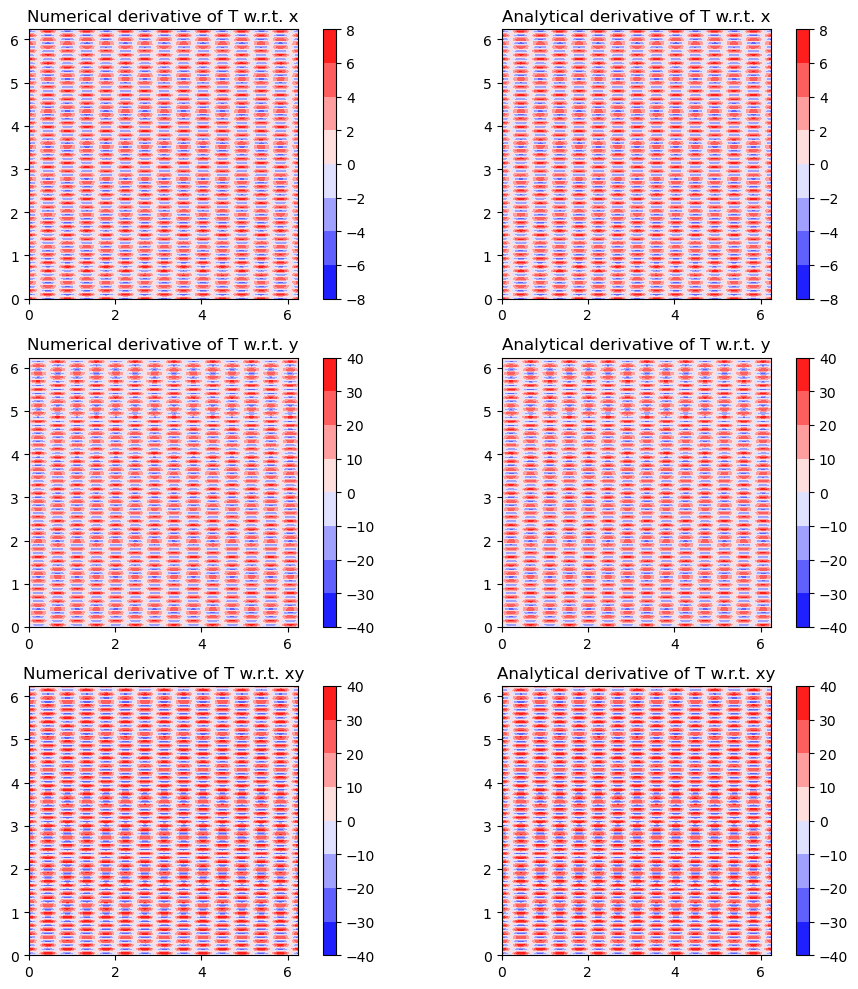

MSE (x-derivative): 1.4863868662050683e-27, Correlation coefficient: 1.0
MSE (y-derivative): 4.352023009705453e-26, Correlation coefficient: 1.0
MSE (xy-derivative): 3.8584591321292824e-24, Correlation coefficient: 1.0


In [1]:
# Import required modules
import numpy as np
from py2d.initialize import initialize_wavenumbers_2DFHIT, gridgen
from py2d.derivative import derivative_2DFHIT
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

# Define the domain size and number of grid points
Lx, Ly = 2*np.pi, 2*np.pi # Domain size
Nx, Ny = 128, 128 # Number of grid points

# Generate grid with given domain size and number of grid points
Lx, Ly, X, Y, dx, dy = gridgen(Lx, Ly, Nx, Ny, INDEXING='ij')

# Initialize wavenumbers for 2D Fourier-based pseudo-spectral differentiation
Kx, Ky, Kabs, Ksq, invKsq = initialize_wavenumbers_2DFHIT(Nx, Ny, Lx, Ly, INDEXING='ij')

# Define the function T(x, y) = sin(Ax)cos(By)
A = 7
B = 34
def T(x, y):
    return np.sin(A*x) * np.cos(B*y)

# Evaluate function T at each grid point
Z = T(X, Y)

# Calculate the numerical derivatives of T w.r.t x and y using numpy.gradient
Tx = derivative_2DFHIT(Z, [1, 0], Kx, Ky, spectral=False)
Ty = derivative_2DFHIT(Z, [0, 1], Kx, Ky, spectral=False)
Txy = derivative_2DFHIT(Z, [1, 1], Kx, Ky, spectral=False)

# Calculate the analytical derivatives of T w.r.t x and y
Tx_analytic = A*np.cos(A*X)*np.cos(B*Y)
Ty_analytic = -B*np.sin(A*X)*np.sin(B*Y)
Txy_analytic = -A*B*np.cos(A*X)*np.sin(B*Y)

# Plotting the numerical and analytical derivatives for comparison
# Each subplot shows a derivative in one direction, with the left column for numerical and right for analytical results
fig, ax = plt.subplots(3, 2, figsize=(10,10))

# Plotting derivatives w.r.t x
contour1 = ax[0,0].contourf(X, Y, Tx, cmap='bwr')
fig.colorbar(contour1, ax=ax[0,0])
ax[0,0].set_title('Numerical derivative of T w.r.t. x')
ax[0,0].set_aspect('equal')

contour2 = ax[0,1].contourf(X, Y, Tx_analytic, cmap='bwr')
fig.colorbar(contour2, ax=ax[0,1])
ax[0,1].set_title('Analytical derivative of T w.r.t. x')
ax[0,1].set_aspect('equal')

# Plotting derivatives w.r.t y
contour3 = ax[1,0].contourf(X, Y, Ty, cmap='bwr')
fig.colorbar(contour3, ax=ax[1,0])
ax[1,0].set_title('Numerical derivative of T w.r.t. y')
ax[1,0].set_aspect('equal')

contour4 = ax[1,1].contourf(X, Y, Ty_analytic, cmap='bwr')
fig.colorbar(contour4, ax=ax[1,1])
ax[1,1].set_title('Analytical derivative of T w.r.t. y')
ax[1,1].set_aspect('equal')

# Plotting mixed derivatives w.r.t xy
contour5 = ax[2,0].contourf(X, Y, Txy, cmap='bwr')
fig.colorbar(contour3, ax=ax[2,0])
ax[2,0].set_title('Numerical derivative of T w.r.t. xy')
ax[2,0].set_aspect('equal')

contour6 = ax[2,1].contourf(X, Y, Txy_analytic, cmap='bwr')
fig.colorbar(contour4, ax=ax[2,1])
ax[2,1].set_title('Analytical derivative of T w.r.t. xy')
ax[2,1].set_aspect('equal')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Calculate mean squared error (MSE) and correlation coefficient between numerical and analytical derivatives
mse_dx = mean_squared_error(Tx_analytic.flatten(), Tx.flatten())
corr_dx, _ = pearsonr(Tx_analytic.flatten(), Tx.flatten())

mse_dy = mean_squared_error(Ty_analytic.flatten(), Ty.flatten())
corr_dy, _ = pearsonr(Ty_analytic.flatten(), Ty.flatten())

mse_dxy = mean_squared_error(Txy_analytic.flatten(), Txy.flatten())
corr_dxy, _ = pearsonr(Txy_analytic.flatten(), Txy.flatten())

# Print MSE and correlation coefficients
print(f"MSE (x-derivative): {mse_dx}, Correlation coefficient: {corr_dx}")
print(f"MSE (y-derivative): {mse_dy}, Correlation coefficient: {corr_dy}")
print(f"MSE (xy-derivative): {mse_dxy}, Correlation coefficient: {corr_dxy}")
